# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier

# sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

# Logistic Regression , KNN , SVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Loading data

In [2]:
# load data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

In [5]:
#droping useless columns
df.drop(['id'], axis='columns', inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


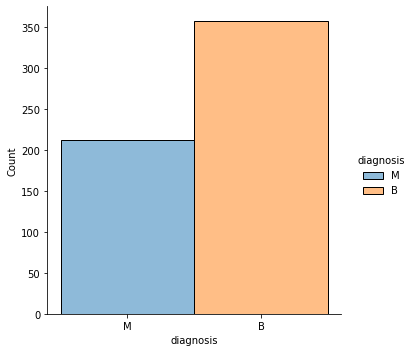

In [6]:
# plotting total malignant and benign value count/count plot/histogram/distribution of samples
sns.displot(df,x=df['diagnosis'], hue = 'diagnosis')

## Missing values

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Converting text into numbers

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Spliting data into X and Y

In [9]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

## Spliting data for training and testing

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [11]:
len(X_train),len(X_test)

(398, 171)

## Feature scaling

In [12]:
scaler = StandardScaler() #-1 se 1

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Mean of all columns
scaler.mean_

array([1.41855000e+01, 1.91928392e+01, 9.23355025e+01, 6.61859045e+02,
       9.64749497e-02, 1.04080000e-01, 8.87943058e-02, 4.94785528e-02,
       1.80698241e-01, 6.26464573e-02, 4.09096231e-01, 1.20445829e+00,
       2.86661859e+00, 4.13843643e+01, 6.98354020e-03, 2.50993719e-02,
       3.12257678e-02, 1.16784749e-02, 2.04023819e-02, 3.73508116e-03,
       1.63596206e+01, 2.55345226e+01, 1.07736030e+02, 8.94246985e+02,
       1.32529045e-01, 2.53368894e-01, 2.68530796e-01, 1.15221410e-01,
       2.89186935e-01, 8.37181407e-02])

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.919179e-16,7.051869e-16,8.926416e-17,-1.115802e-17,-3.749095e-16,1.696019e-16,7.141133e-17,-1.115802e-16,1.467280e-16,3.436670e-16,...,-4.373944e-16,-7.230397e-16,-2.320868e-16,0.000000,-3.570567e-17,2.454764e-16,-4.463208e-17,1.517491e-16,3.302774e-16,2.231604e-18
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.004538e+00,-2.265799e+00,-1.962370e+00,-1.415904e+00,-3.154619e+00,-1.661853e+00,-1.137578e+00,-1.263267e+00,-2.665744e+00,-1.851347e+00,...,-1.699888e+00,-2.201156e+00,-1.665615e+00,-1.187480,-2.672370e+00,-1.473214e+00,-1.391304e+00,-1.756275e+00,-2.094184e+00,-1.599036e+00
25%,-6.887687e-01,-7.551212e-01,-6.882273e-01,-6.596851e-01,-7.004241e-01,-7.313526e-01,-7.483043e-01,-7.345076e-01,-6.842324e-01,-7.240302e-01,...,-6.669023e-01,-7.605410e-01,-6.860942e-01,-0.632759,-7.068235e-01,-6.827132e-01,-7.742265e-01,-7.606279e-01,-6.524167e-01,-6.833502e-01
50%,-2.435940e-01,-1.117840e-01,-2.504428e-01,-3.097783e-01,-3.165413e-02,-1.970875e-01,-3.349449e-01,-3.985115e-01,-5.525183e-02,-1.359284e-01,...,-2.913171e-01,-6.181413e-02,-2.987167e-01,-0.355462,-1.215325e-02,-2.435097e-01,-2.004118e-01,-2.494669e-01,-1.300027e-01,-2.031343e-01
75%,4.415577e-01,5.745618e-01,4.907188e-01,3.203135e-01,6.421523e-01,4.840367e-01,5.122082e-01,6.521782e-01,5.246593e-01,4.507140e-01,...,5.334579e-01,6.381342e-01,5.241247e-01,0.333281,5.551245e-01,4.926776e-01,5.710645e-01,7.023581e-01,4.590940e-01,4.535557e-01
max,3.874272e+00,3.492577e+00,3.887288e+00,5.023637e+00,3.469765e+00,4.067714e+00,4.330322e+00,3.873693e+00,4.400250e+00,5.077455e+00,...,3.968676e+00,3.909853e+00,4.168365e+00,5.626762,3.922860e+00,5.243276e+00,4.333890e+00,2.668655e+00,5.912480e+00,6.901830e+00


## Building model

## K-nearest Neighbour

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test_scaled,Y_test)

0.9590643274853801

In [16]:
Y_predict = knn.predict(X_test_scaled)

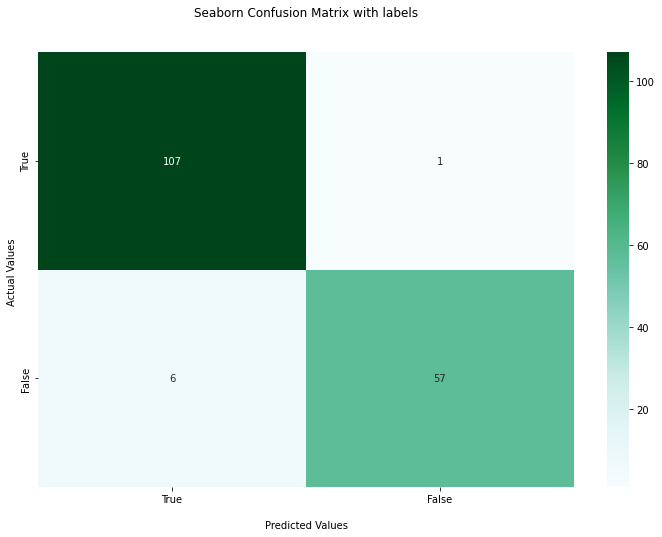

In [17]:
cm = confusion_matrix(Y_test,Y_predict)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='BuGn', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot: >

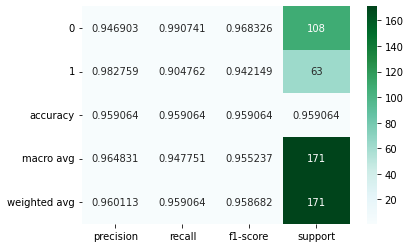

In [18]:
clf_report = classification_report(Y_test,
                                   Y_predict,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='BuGn', fmt='g')

## Support Vector Machine (SVM Classifier)

In [19]:
# an initial SVM model with linear kernel   
svm_linear = SVC(kernel='linear')

# fit
svm_linear.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

In [20]:
Y_predict = svm_linear.predict(X_test_scaled)

In [21]:
svm_linear.score(X_test_scaled,Y_test)

0.9590643274853801

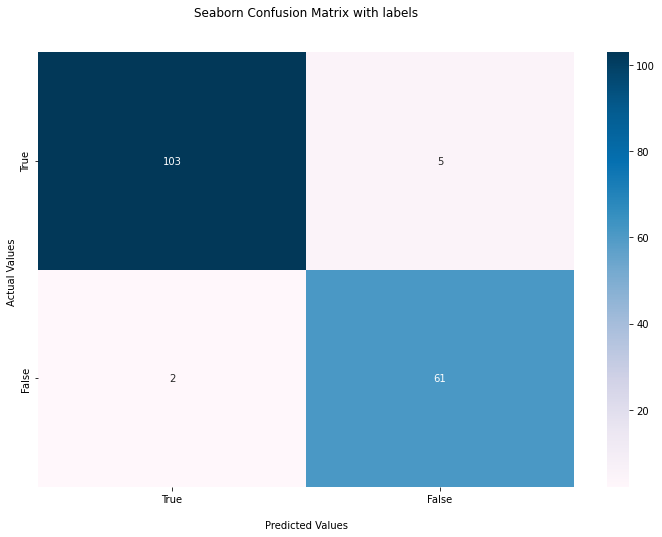

In [22]:
cm = confusion_matrix(Y_test,Y_predict)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot: >

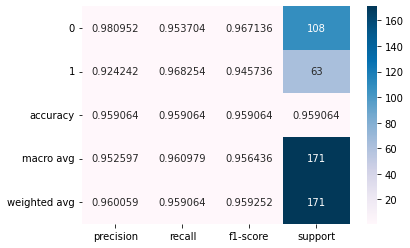

In [23]:
clf_report = classification_report(Y_test,
                                   Y_predict,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

## Random Forest

In [24]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [25]:
Y_predict = RF.predict(X_test_scaled)

In [26]:
RF.score(X_test_scaled,Y_test)

0.9649122807017544

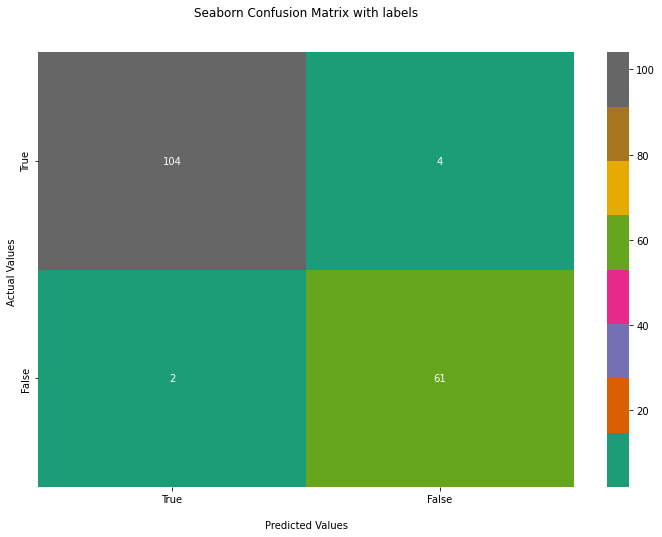

In [27]:
cm = confusion_matrix(Y_test,Y_predict)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='Dark2', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot: >

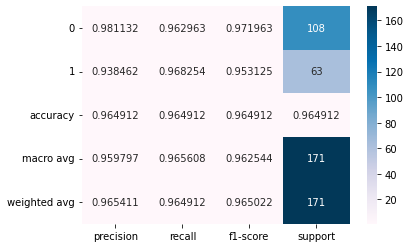

In [28]:
clf_report = classification_report(Y_test,
                                   Y_predict,
                                   target_names=[0,1],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap='PuBu', fmt='g')

## Hyper parameter tuning

## for KNN

In [29]:
i=np.arange(40)
parameters = {'n_neighbors':i}
# instantiate a model 
knn_grid_search = KNeighborsClassifier()

# create a classifier to perform grid search
knn = GridSearchCV(knn_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)
# knn = KNeighborsClassifier(n_neighbors=i)
# fit
knn.fit(X_train_scaled, Y_train)

C:\Users\mawai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mawai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mawai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\mawai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])},
             return_train_score=True, scoring='accuracy')

In [30]:
cv_results = pd.DataFrame(knn.cv_results_)
cv_results[['param_n_neighbors', 'mean_test_score', 'mean_train_score']]

,param_n_neighbors,mean_test_score,mean_train_score
0,0,NaN,NaN
1,1,0.952247,1.000000
2,2,0.947247,0.977388
3,3,0.962373,0.981158
4,4,0.954778,0.971103
5,5,0.952278,0.972366
6,6,0.959873,0.970482
7,7,0.964937,0.969226
8,8,0.959842,0.966712
9,9,0.959842,0.967345


In [31]:
knn.best_params_

{'n_neighbors': 7}

In [32]:
knn_tuned = KNeighborsClassifier(n_neighbors=7)
knn_tuned.fit(X_train_scaled,Y_train)
knn_tuned.score(X_test_scaled,Y_test)

0.9590643274853801

## for SVM

In [33]:
parameters = {'C':[1,10,100], 
             'gamma': [1e-2, 1e-3, 1e-4],
              'kernel': ['linear','rbf']}

# instantiate a model 
svc_grid_search = SVC()

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy',return_train_score=True,n_jobs=-1)

# fit
clf.fit(X_train_scaled, Y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [34]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008392,8.013848e-04,0.003997,9.818678e-07,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",1.0000,0.9625,...,0.982468,0.016947,3,0.987421,0.993711,0.990566,0.987461,0.987461,0.989324,0.002504
1,0.008994,6.910027e-07,0.008195,2.783946e-03,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.9750,0.9500,...,0.967405,0.014927,12,0.965409,0.984277,0.971698,0.978056,0.971787,0.974245,0.006415
2,0.008395,4.892793e-04,0.003398,4.902908e-04,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",1.0000,0.9625,...,0.982468,0.016947,3,0.987421,0.993711,0.990566,0.987461,0.987461,0.989324,0.002504
3,0.010792,1.165149e-03,0.008596,3.717756e-03,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.9375,0.9250,...,0.942215,0.017044,16,0.943396,0.946541,0.940252,0.940439,0.949843,0.944094,0.003678
4,0.007795,7.474490e-04,0.003598,4.891228e-04,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",1.0000,0.9625,...,0.982468,0.016947,3,0.987421,0.993711,0.990566,0.987461,0.987461,0.989324,0.002504


In [35]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [36]:
best_SVM = SVC(C=10,gamma=0.01,kernel='rbf')
best_SVM.fit(X_train_scaled,Y_train)

SVC(C=10, gamma=0.01)

In [37]:
Y_predict = best_SVM.predict(X_test_scaled)

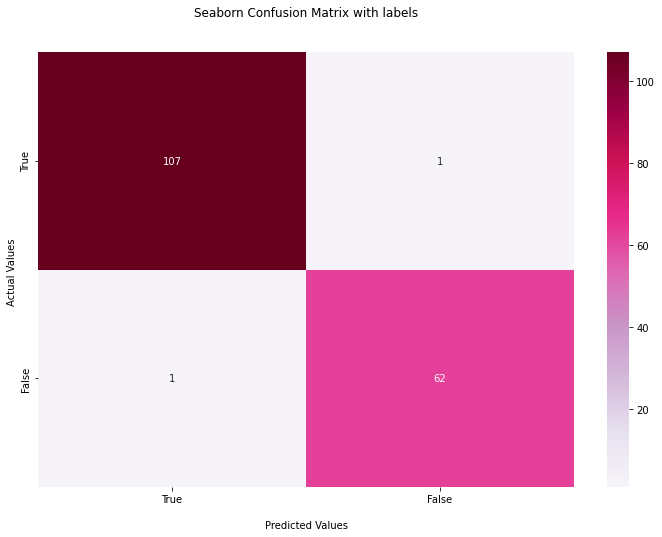

In [38]:
cm = confusion_matrix(Y_test,Y_predict)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## for Random Forest

In [39]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy',return_train_score=True,
                          cv = 3, n_jobs = -1,verbose = 1)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6256360598465861 using {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [42]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
best_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100)

In [43]:
# fit
best_rfc.fit(X_train_scaled,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=200)

In [44]:
Y_predict = best_rfc.predict(X_test_scaled)

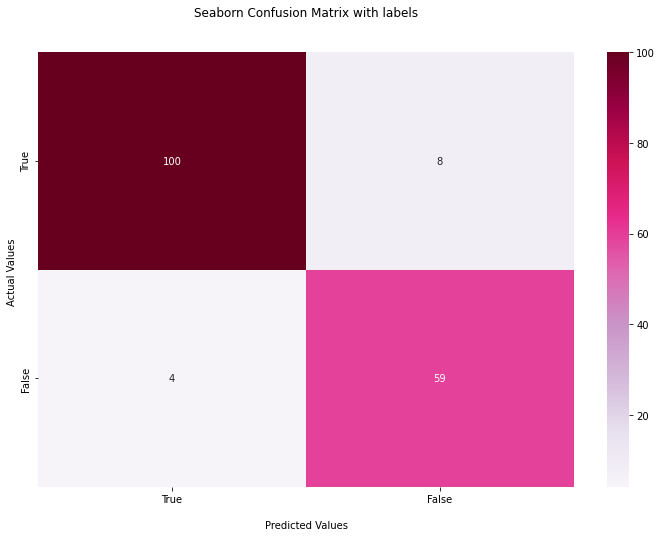

In [45]:
cm = confusion_matrix(Y_test,Y_predict)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='PuRd', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
model_ls = []
for model in [knn,svm_linear,RF,best_SVM,best_rfc,knn_tuned]:
    model_ls.append(model.score(X_test_scaled,Y_test))
model_score = pd.DataFrame(model_ls,columns=['Accuracy'],index= ['KNN','SVM Linear','Random forest','Tuned_SVM','Tuned_RandomForest','Tuned_KNN'])

In [47]:
model_score

,Accuracy
KNN,0.959064
SVM Linear,0.959064
Random forest,0.964912
Tuned_SVM,0.988304
Tuned_RandomForest,0.929825
Tuned_KNN,0.959064
